# Payment Default Risk Prediction
**Author:** Mathias Gomez Chan  
**Date:** December 2025  
**Objective:** Build a logistic regression model to predict credit card payment defaults

---

## Business Context
Financial institutions need to assess the risk of customers defaulting on payments. This model will help identify high-risk customers for proactive intervention.

**Dataset:** UCI Credit Card Default  
**Source:** https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [ ]:
# !kaggle datasets download -d uciml/default-of-credit-card-clients-dataset -p .


Dataset URL: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
License(s): CC0-1.0




  0%|          | 0.00/0.98M [00:00<?, ?B/s]
100%|██████████| 0.98M/0.98M [00:00<00:00, 528MB/s]


## 1. Setup & Data Loading

In [ ]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
import statsmodels as st 

# Load data
df = pd.read_csv('UCI_Credit_Card.csv')



In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 2. Exploratory Data Analysis (EDA)

**YOUR TASK:**
1. Check for missing values
2. Analyze the target variable distribution (default vs non-default)
3. Explore correlations between features
4. Create 2-3 visualizations (your choice)

**QUESTIONS TO ANSWER:**
- Is the dataset balanced? (What % are defaults?)
- Which features have strongest correlation with default?
- Are there any outliers?

In [ ]:
# df tratement for nan and, general information

df.info()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.describe().round(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,...,30000.000,30000.000,30000.000,30000.00,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,15000.500,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,...,43262.949,40311.401,38871.760,5663.58,5921.164,5225.682,4826.077,4799.388,5215.503,0.221
std,8660.398,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,...,64332.856,60797.156,59554.108,16563.28,23040.870,17606.961,15666.160,15278.306,17777.466,0.415
min,1.000,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,...,-170000.000,-81334.000,-339603.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
25%,7500.750,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,...,2326.750,1763.000,1256.000,1000.00,833.000,390.000,296.000,252.500,117.750,0.000
50%,15000.500,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,...,19052.000,18104.500,17071.000,2100.00,2009.000,1800.000,1500.000,1500.000,1500.000,0.000
75%,22500.250,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,...,54506.000,50190.500,49198.250,5006.00,5000.000,4505.000,4013.250,4031.500,4000.000,0.000
max,30000.000,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,...,891586.000,927171.000,961664.000,873552.00,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


In [18]:
# data types updated for categorical values
df['ID'] = df['ID'].astype('object') 
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['PAY_0']= df['PAY_0'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')


In [19]:
# Correlation study among variables
## segmentation of variables
numeric_cols = df.select_dtypes(include=['int64','float']).columns
categorical_cols = df.select_dtypes(include=['category'])

## correlation for cuantitative variables
correlation_num = df[numeric_cols].corr()['default.payment.next.month'].sort_values(ascending=False)
print(correlation_num)


default.payment.next.month    1.000000
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default.payment.next.month, dtype: float64


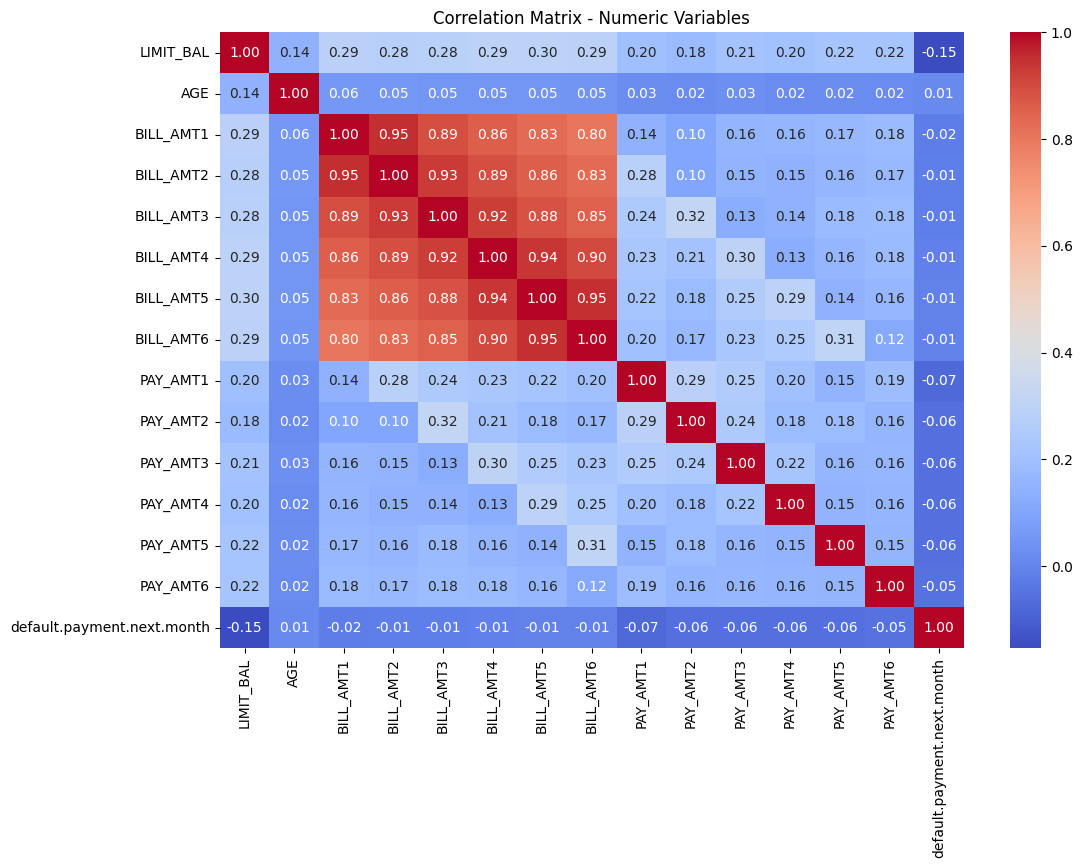

In [21]:
# Heatmap visual
plt.figure(figsize=(12, 8))
sb.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix - Numeric Variables')
plt.show()

The correlation of pearson stadistic, demostrates a low negative correlation between the 'default payment variable' and, almost all the rest of the cuantitative variable. Only the age variable is showing a positive correlation. Considering that the statistics for reach variable are close from 0, we can conclude that the relation of these variables is weak.


SEX:
default.payment.next.month      0     1
SEX                                    
1                            9015  2873
2                           14349  3763
Chi2: 47.71, p-value: 0.0000


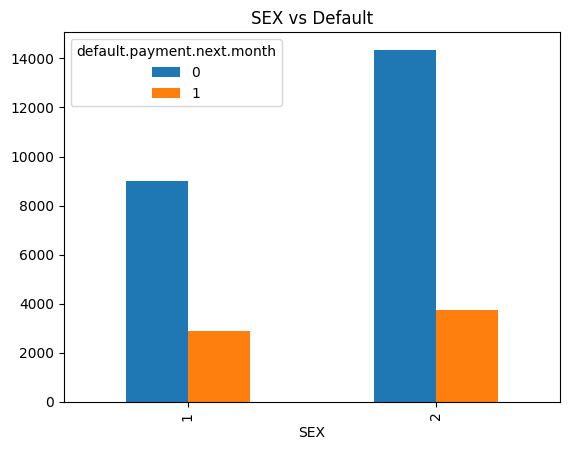


EDUCATION:
default.payment.next.month      0     1
EDUCATION                              
0                              14     0
1                            8549  2036
2                           10700  3330
3                            3680  1237
4                             116     7
5                             262    18
6                              43     8
Chi2: 163.22, p-value: 0.0000


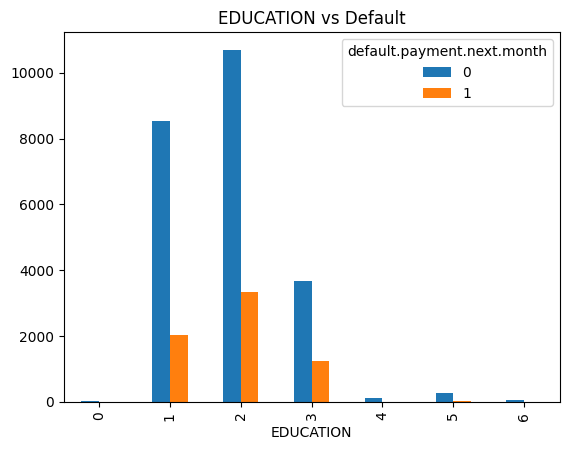


MARRIAGE:
default.payment.next.month      0     1
MARRIAGE                               
0                              49     5
1                           10453  3206
2                           12623  3341
3                             239    84
Chi2: 35.66, p-value: 0.0000


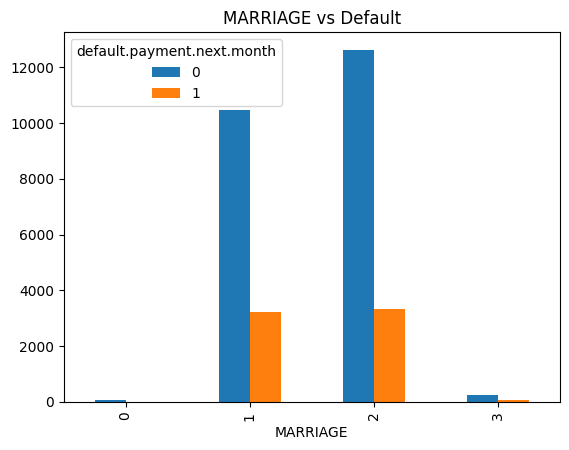


PAY_0:
default.payment.next.month      0     1
PAY_0                                  
-2                           2394   365
-1                           4732   954
 0                          12849  1888
 1                           2436  1252
 2                            823  1844
 3                             78   244
 4                             24    52
 5                             13    13
 6                              5     6
 7                              2     7
 8                              8    11
Chi2: 5365.96, p-value: 0.0000


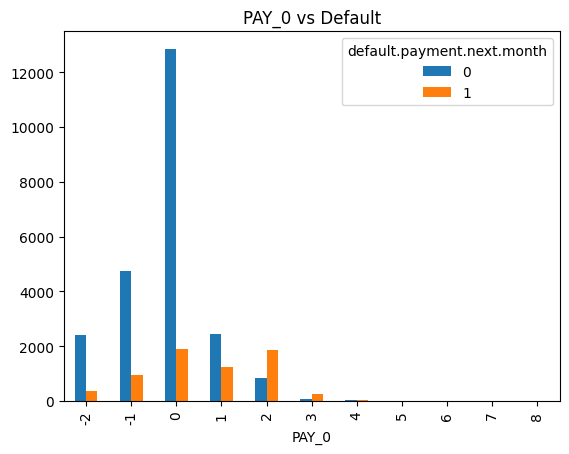


PAY_2:
default.payment.next.month      0     1
PAY_2                                  
-2                           3091   691
-1                           5084   966
 0                          13227  2503
 1                             23     5
 2                           1743  2184
 3                            125   201
 4                             49    50
 5                             10    15
 6                              3     9
 7                              8    12
 8                              1     0
Chi2: 3474.47, p-value: 0.0000


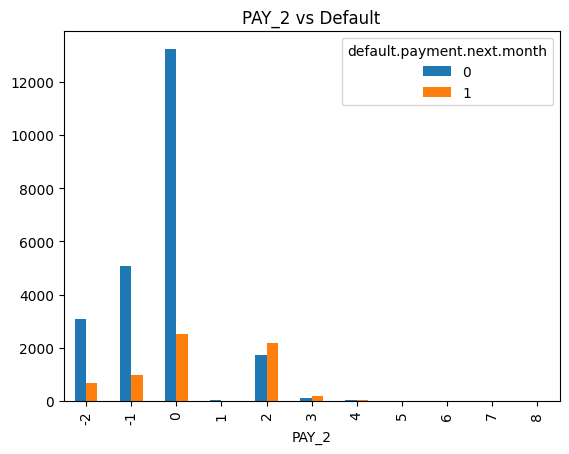


PAY_3:
default.payment.next.month      0     1
PAY_3                                  
-2                           3328   757
-1                           5012   926
 0                          13013  2751
 1                              3     1
 2                           1850  1969
 3                            102   138
 4                             32    44
 5                              9    12
 6                              9    14
 7                              5    22
 8                              1     2
Chi2: 2622.46, p-value: 0.0000


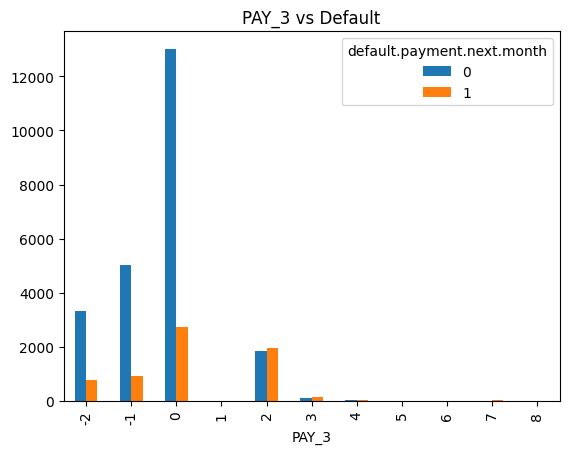


PAY_4:
default.payment.next.month      0     1
PAY_4                                  
-2                           3511   837
-1                           4783   904
 0                          13439  3016
 1                              1     1
 2                           1506  1653
 3                             70   110
 4                             23    46
 5                             17    18
 6                              3     2
 7                             10    48
 8                              1     1
Chi2: 2341.47, p-value: 0.0000


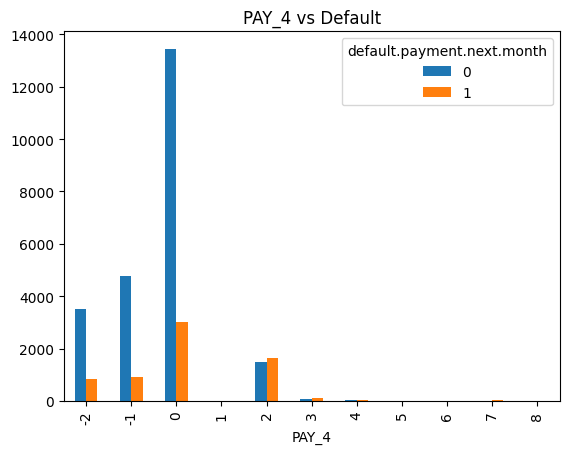


PAY_5:
default.payment.next.month      0     1
PAY_5                                  
-2                           3651   895
-1                           4642   897
 0                          13752  3195
 2                           1203  1423
 3                             65   113
 4                             33    51
 5                              7    10
 6                              1     3
 7                             10    48
 8                              0     1
Chi2: 2197.69, p-value: 0.0000


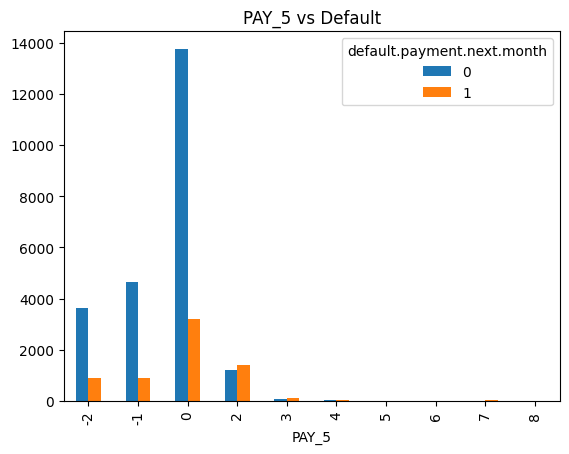


PAY_6:
default.payment.next.month      0     1
PAY_6                                  
-2                           3914   981
-1                           4765   975
 0                          13217  3069
 2                           1365  1401
 3                             66   118
 4                             18    31
 5                              6     7
 6                              5    14
 7                              8    38
 8                              0     2
Chi2: 1886.84, p-value: 0.0000


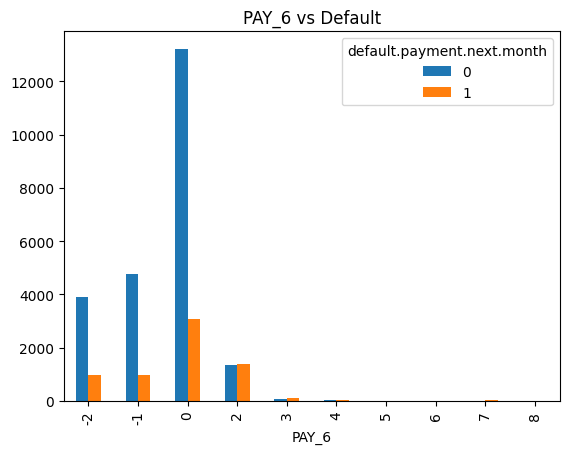

In [22]:
## correlation for cualitative variables
from scipy.stats import chi2_contingency

# Para cada variable categórica
for cat_col in categorical_cols:
    # Tabla de contingencia
    contingency = pd.crosstab(df[cat_col], df['default.payment.next.month'])
    print(f"\n{cat_col}:")
    print(contingency)
    
    # Test chi-cuadrado
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    print(f"Chi2: {chi2:.2f}, p-value: {p_value:.4f}")
    
    # Visualización
    contingency.plot(kind='bar', stacked=False)
    plt.title(f'{cat_col} vs Default')
    plt.show()

### PAUSA: Reflexión

**Responde estas preguntas (escribe tus respuestas como comentarios):**
1. ¿El dataset está balanceado? Si no, ¿cómo afecta esto al modelo?
2. ¿Qué variable parece más predictiva del default?
3. ¿Hay multicolinealidad entre predictores? ¿Cómo lo sabes?

## 3. Feature Engineering

**YOUR TASK:**
1. Select features for the model (no uses todas, elige 5-7 relevantes)
2. Handle categorical variables if any (usa one-hot encoding con drop_first=True)
3. Check for and handle any data quality issues

**PREGUNTA SOCRÁTICA:**
Si tienes variables categóricas como 'EDUCATION' o 'MARRIAGE':
- ¿Usarías label encoding o one-hot encoding?
- ¿Por qué drop_first=True es importante?

In [ ]:
# YOUR CODE HERE
# Select features


# Handle categorical variables


# Create X (features) and y (target)


## 4. Train-Test Split

**YOUR TASK:**
1. Split data into train (80%) and test (20%)
2. Use stratification (important for imbalanced data)
3. Set random_state=42 for reproducibility

**HINT:** `from sklearn.model_selection import train_test_split`  
**PREGUNTA:** ¿Por qué es importante stratify cuando el dataset está desbalanceado?

In [ ]:
# YOUR CODE HERE


## 5. Model Building - statsmodels (Inferencia Rigurosa)

**YOUR TASK:**
1. Fit logistic regression using statsmodels
2. Display summary with p-values, coefficients, confidence intervals
3. Interpret results

**HINT:**
```python
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)  # Important!
model_sm = sm.Logit(y_train, X_train_sm)
result_sm = model_sm.fit()
```

**PREGUNTAS A RESPONDER:**
- ¿Qué variables son estadísticamente significativas (p < 0.05)?
- ¿Cuál es la interpretación del coeficiente de [variable más importante]?
- ¿El signo del coeficiente tiene sentido de negocio?

In [ ]:
# YOUR CODE HERE


## 6. Model Building - scikit-learn (Validación ML)

**YOUR TASK:**
1. Fit LogisticRegression usando sklearn
2. Make predictions on test set
3. Generate probability scores

**HINT:**
```python
from sklearn.linear_model import LogisticRegression
model_sk = LogisticRegression(max_iter=1000, random_state=42)
```

In [ ]:
# YOUR CODE HERE


## 7. Model Evaluation

**YOUR TASK:**
1. Calculate confusion matrix
2. Compute Precision, Recall, F1-Score
3. Calculate AUC-ROC
4. Plot ROC curve

**PREGUNTA CRÍTICA (recuerda tu error anterior):**
- Para este problema de negocio, ¿qué métrica debes priorizar: Precision o Recall?
- ¿Por qué? (piensa en el costo de FN vs FP)

**HINT:**
```python
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
```

In [ ]:
# YOUR CODE HERE
# Confusion matrix


# Classification report


# ROC-AUC


## 8. Threshold Optimization (AVANZADO)

**YOUR TASK:**
1. Test different thresholds (0.3, 0.4, 0.5, 0.6)
2. Calculate Recall for each threshold
3. Choose optimal threshold for business

**PREGUNTA:**
Si el banco quiere detectar 85% de defaults (Recall = 0.85), ¿qué threshold deberías usar?  
¿Cuál sería el trade-off (qué pierdes en Precision)?

In [ ]:
# YOUR CODE HERE
# Hint: Loop through thresholds
# thresholds = [0.3, 0.4, 0.5, 0.6]


## 9. Business Insights & Recommendations

**YOUR TASK (escribe en Markdown):**

1. **Model Performance:** ¿El modelo es útil? (AUC > 0.7 es bueno)
2. **Key Drivers:** ¿Qué variables predicen más el default?
3. **Business Action:** ¿Qué threshold recomendarías al negocio? ¿Por qué?
4. **Limitations:** ¿Qué mejoras harías al modelo?

**FORMATO:**
- 3-5 bullets por sección
- Usa lenguaje de negocio (no solo jerga técnica)
- Incluye números concretos ("El modelo detecta 82% de defaults...")

### YOUR INSIGHTS HERE:

**Model Performance:**
- 

**Key Drivers:**
- 

**Business Recommendation:**
- 

**Next Steps:**
- 

## 10. Export Model (OPCIONAL)

**YOUR TASK:**
Save your trained model using joblib

```python
import joblib
joblib.dump(model_sk, '../models/logistic_model.pkl')
```

In [ ]:
# YOUR CODE HERE (if you want)


---

## 📝 Final Checklist

Antes de subir a GitHub, verifica:

- [ ] Todas las celdas ejecutan sin errores
- [ ] Gráficas tienen títulos y labels claros
- [ ] Respondiste las preguntas de reflexión
- [ ] Sección de Business Insights está completa
- [ ] Código está comentado en partes clave
- [ ] README.md del proyecto está actualizado

---

**SIGUIENTE PASO:**
Cuando termines, pídemele code review. Te daré feedback específico sobre:
1. Calidad del código
2. Razonamiento estadístico
3. Presentación profesional
4. Qué mejorar antes de publicar en GitHub